# Deployment

Now we're going to deploy our container to Rahti2. Rahti2 is a container-based Platform as a Service (PaaS) provided by CSC (IT Center for Science in Finland), designed for scalable hosting of applications and services. Unlike using Kubernetes directly, which requires managing container orchestration, deployment, and scaling, Rahti simplifies these processes by integrating Kubernetes with additional tools and user interfaces, providing a more streamlined, managed environment. This integration allows users to deploy, manage, and scale applications with minimal manual intervention, offering pre-configured settings, automatic scaling, a secure container registry, and built-in monitoring, making it accessible even for users without deep expertise in Kubernetes.

In order to deploy to Rahti2 you are going to need the following things:
    1. A csc-account
    2. Access to a csc project
    3. To accept the terms for rahti2 through the csc project
    4. A containerized app to deploy

So first you should set up a csc account and get access to a project. Once you have access to a project you should visit the project page, and on the right side locate the rahti tab. There you should accept the terms for rahti in order to access it. 
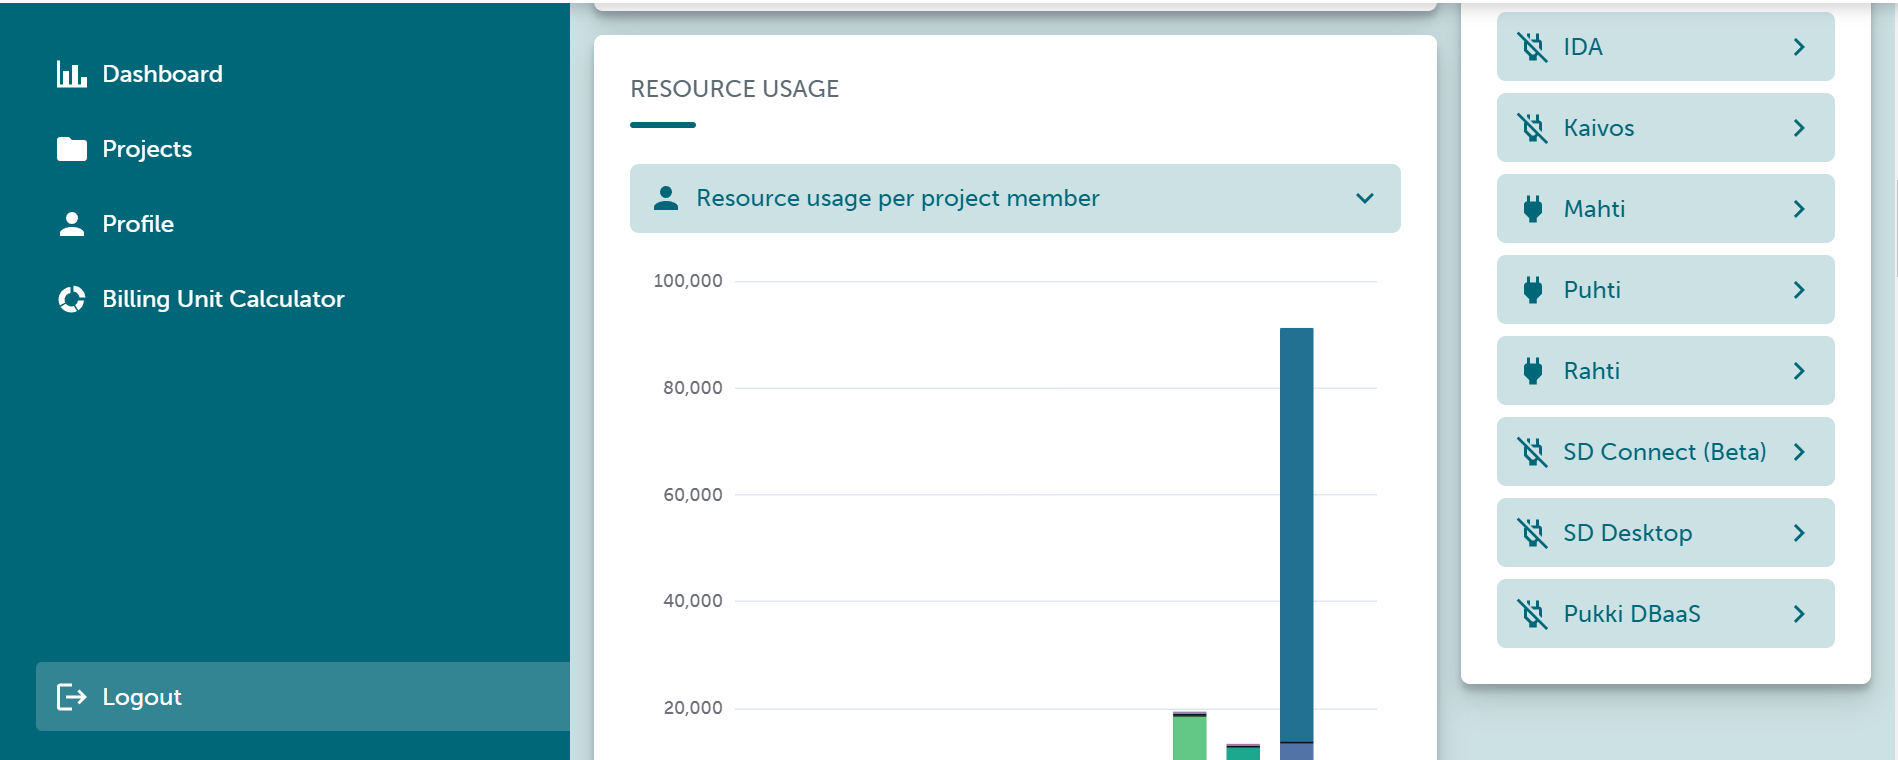




In the image above you can see a menu on the right hand side. There, you can see a Rahti tab. If you click the arrow you should see the option to accept the terms.

Once you have access to Rahti, you can visit the webpage rahti.csc.fi and log in to the rahti2 platform. There you will see the rahti-projects connected to the csc project you have access to. Now we're going to create our own rahti-project. When creating a new project it is good to keep two things in mind:
    1. the name of the project has to be in only lowercase
    2. You need to enter the csc project number into the description field. It has to be entered in the following way:
        csc_project: {insert project number}
    The project number can be found from the my.csc.fi page where the projects you have access to are visible.

   
You can follow the tutorial below in order to create a new project. The steps are as follows:

1. Log into the rahti2 platform
2. press the "create project" button
3. enter a name for the project in lowercase letters
4. in the description field enter the csc project number as described above
5. press "create" to confirm
6. The project should now have been created successfully!
<video controls src="new-rahti-project.mp4" title="Title"></video>


Okay, now that we have a project where we can deploy our container, we can move on to the next step! You can either follow the written instructions below, or watch the video for additional suppport.

1. Copy the notebook into it's own repository
    - The repository should be public
2. On the rahti2 platform, switch to developer mode in the menu on the left
3. Press the "Add+" button and choose to add from github
4. copy the repository address from github and paste it into the field on the rahti2 platform
5. Open up the advanced Git Options
6. Enter "main" into the "git reference" field. Rahti automatically assumes that the main branch is called master, so we need to correct this.
7. Enter "/containerization_example" into the "context dir" field. This needs to be done since our app is in a subdirectory, the folder "containerization_example" in the github repository.
8. You should now notice that the import strategy has been automatically selected as dockerfile, since the file has been detected in the folder.  
9. make sure that all the settings comply with what you have in the Dockerfile
    - port = 3000
10. Make sure the name is unique and has not been used before. 
11. Press "create". You should now be taken to the topology view. 
12. If you press the symbol representing the deployment you should see some additional information about it. Wait until the build is completed.
13. Once the build is completed you can scroll down to "routes" and open the url associated with the deployment. 
14. If the deployment was succesful, this should open up the UI we created in the app.js file!
    

<video controls src="deployment.mp4" title="Title"></video>

Now we see that in order for the deployment to work, it is very important that the dockerfile is configured correctly and that it is present in the right directory. This simplifies the process as the rahti platform automatically detects it and picks the right import strategy.

Rahti also simplifies the deployment process by using webhooks. Since the deployment shown above was created by importing from Git, the necessary prerequesits for a github webhook have already been generated by rahti. Webhooks are URLs that allow triggering actions in a system. So basically, the github webhook allows for automatic deployment when you push a new update to the github repository. For this to work you need to provide both the webhook url and secret to github. These have already been created by rahti and can be found under the build tab in developer view. Follow these steps:
- Go to the builds tab which should be found on the left side of the UI. 
- click the build that you want to create the webhook for
- scroll down until you find the webhooks section
- locate the webhook that is of the type github and press the copy URL with Secret button
- navigate to the repository on github and go to settings > webhooks
- create a new webhook by pasting the URL and secret into to fields
   Make sure to change the content type to application/JSON!
- To test the webhook we can make a simple change to our app by for example adding a new line in the index.html file
- when we push the update we can go to the rahti page and see how there's a new build for the app    
- once the build finishes we can see the update on our webpage!

<video controls src="webhook.mp4" title="Title"></video>